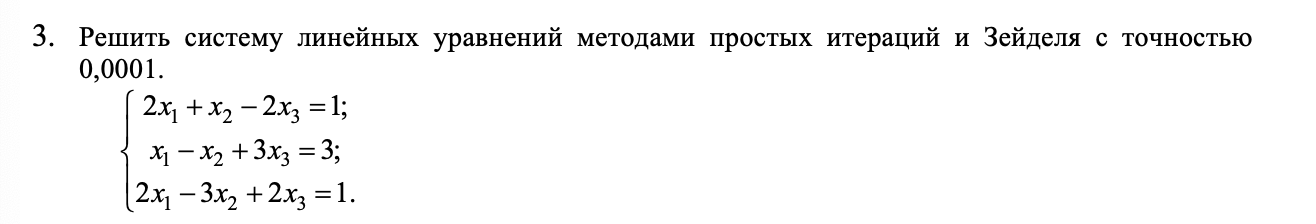

In [5]:
import numpy as np

import numpy as np
 
def SIM(a, b, eps) :
    #сортируем матрицу по диагонали
    n = len(a)
    a = np.array(a)
    b = np.array(b)
    for i in range(n):
        ind = np.abs(a[i:, i:n]).argmax()
        row = ind // (n - i) + i
        col = ind % (n - i) + i 
        a[:,[i, col]] = a[:,[col, i]]
        a[[i, row], :] = a[[row, i], :]
        b[i], b[row] = b[row], b[i]

    diag = (1/np.diag(a)).reshape(-1,1)
    a[np.diag_indices_from(a)] = 0.
    a = np.hstack((-a, b.reshape(-1, 1))) * diag
    x = a[:,-1].ravel()
    x = np.append(x, 1)
    
    tmp = x.copy() + eps
    cnt = 0
    while abs(x-tmp).sum() > eps:
        tmp = x.copy()
        x = a.dot(x)
        x = np.append(x, 1)
        cnt += 1

    print((f"Решение методом простых итераций: {x[:-1].round(3)} найдено за {cnt} итераций")) 

def seidel(A, b, eps):

    #проверим метод на схождение
    diag = np.diag(np.abs(A)) 

    off_diag = np.sum(np.abs(A), axis=1) - diag 

    if np.all(diag <= off_diag):
        print("Решение методом Зейделя не может быть найдено, так как он расходится")
        return
    
    n = len(A)
    x = np.zeros(n)

    for cnt in range (100):
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        if np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps:
          print(f"Решение методом Зейделя: {x} найдено за {cnt} итераций")
          return
        x = x_new
    print("Решение методом Зейделя не найдено")
    return

'''           
    Приведем матрицу изначальную матрицу А|b к матрице с диагональным преобладанием

    [2,  1, -2 | 1]      [3,   0, 1 |  4]
    [1, -1,  3 | 3] <=>  [-1, -3, 1 | -3]                     
    [2, -3,  2 | 1]      [ 1, -1, 3 |  3] 
'''

A = np.array([[3, 0, 1],
              [-1, -3, 1],
              [1, -1, 3]])
B = np.array([4, -3, 3])

eps = 0.0001

print(f"Решение системы встроенной функцией: {np.linalg.solve(A,B)}")
SIM(A, B, eps)
seidel(A, B, eps)

Решение системы встроенной функцией: [1. 1. 1.]
Решение методом простых итераций: [1. 1. 1.] найдено за 14 итераций
Решение методом Зейделя: [1.00002624 0.99996501 0.99997959] найдено за 8 итераций
